[308.6968617]
[[-9.12024280e+01  1.11007097e+02  7.71402264e+02  2.78082492e+01
  -2.63723500e+02 -2.09069160e-02  8.66768212e-03  1.11871316e-01
   6.60129161e-02  9.93327699e-02 -2.23785400e+01 -2.38614298e+02
   1.85533390e+03  1.02526992e-01]]
mean squared error:465829337.4800718
r2:0.0824545061594133
r:0.28714892679481374
root mean squared error:21583.079888655182


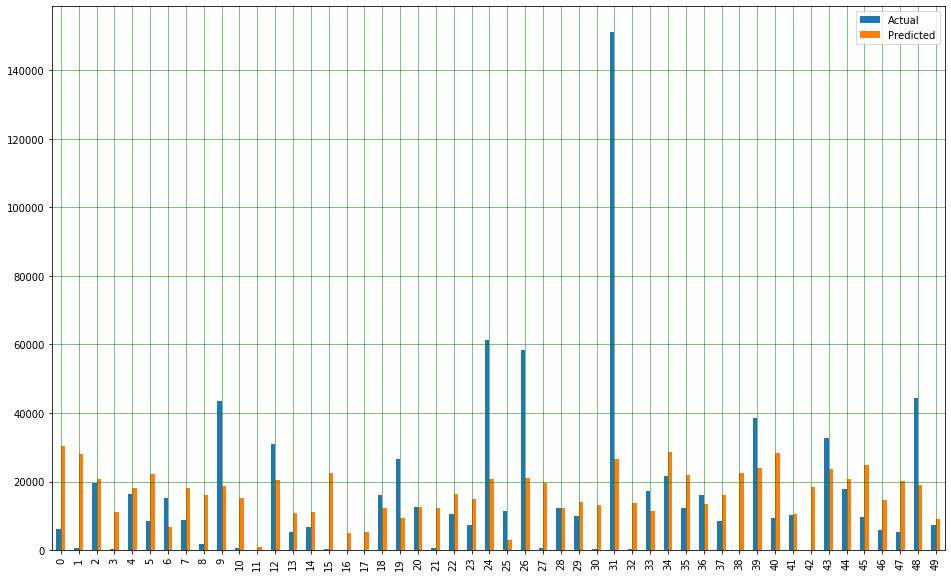

In [99]:
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix



df_train = pd.read_csv('Desktop/walmart data/course-material-walmart-challenge/train.csv')
df_test = pd.read_csv('Desktop/walmart data/course-material-walmart-challenge/test.csv')

#df_train.corr(method ='pearson')

#print(df_train.head())
df_train = df_train.replace('A',1, regex=True)
df_train = df_train.replace('B',2, regex=True)
df_train = df_train.replace('C',3, regex=True)

array = df_train.values
X = array[:,[0,1,4,5,6,7,8,9,10,11,12,13,14,15]]
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imp.fit_transform(X)
y = array[:,3:4]

# df = pd.DataFrame(X, ["1","2","3","4","5","6","7","8","9","10","11","12","13","14"])
# df.corr(method ='pearson') 

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.10, random_state=1)

regressor = LinearRegression()  
regressor.fit(X_train, Y_train)
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

y_pred = regressor.predict(X_test)


print("mean squared error:"+ str(mean_squared_error(Y_test,y_pred)))
print("r2:"+ str(r2_score(Y_test,y_pred)))
print("r:"+ str(np.sqrt((r2_score(Y_test,y_pred)))))
print("root mean squared error:"+ str(np.sqrt((mean_squared_error(Y_test,y_pred)))))

df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten()})
df

df1 = df.head(50)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()